In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

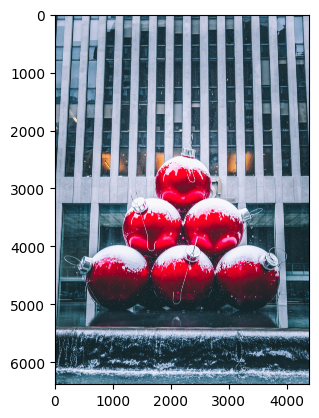

In [ ]:
# 1. С помощью библиотеки OpenCV считайте изображение:
img = cv2.imread('/content/andre-benz-inDj6_F24GQ-unsplash.jpg')
# 2. Преобразуйте в палитру RGB.
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
# 3. Отношение ширины к высоте
img.shape[1] / img.shape[0]

0.688293370944993

In [ ]:
# Сожмите изображение (далее сжатое изображение) до ширины 2196,
#соблюдая пропорции исходного изображения. Важно: коэффициент отношения сторон при вычислениях не округляйте.
#Если высота не окажется целой, округлите значение до целого в меньшую сторону. Используйте cv2.resize() с параметром interpolation = cv2.INTER_AREA.
h, w, c = rgb.shape

new_width = 2196

k = float(w) / h
dim = (new_width, int(new_width / k))

rgb = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

rgb.shape[0]

3190

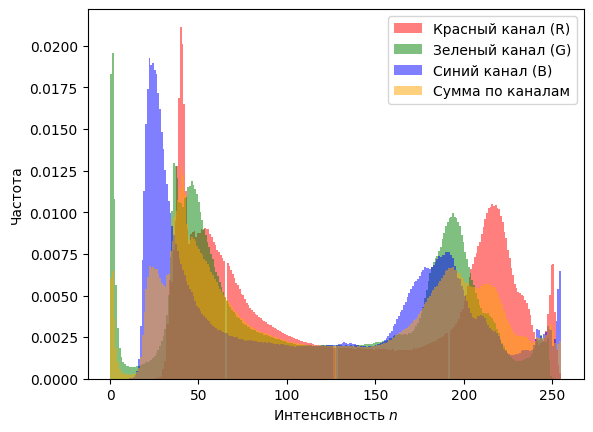

In [ ]:
#4. Постройте гистограмму сжатого изображения в палитре RGB. Сравните оценку плотностей распределения интенсивностей по каналам R, G и B.
#Введите наибольшее значение плотности среди трех каналов: Результат введите с точностью до 4 знаков после запятой.


plt.hist(rgb[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
plt.hist(rgb[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
plt.hist(rgb[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.hist(rgb.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True)
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)', 'Сумма по каналам'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Частота')
plt.show()

0.02115205733068933

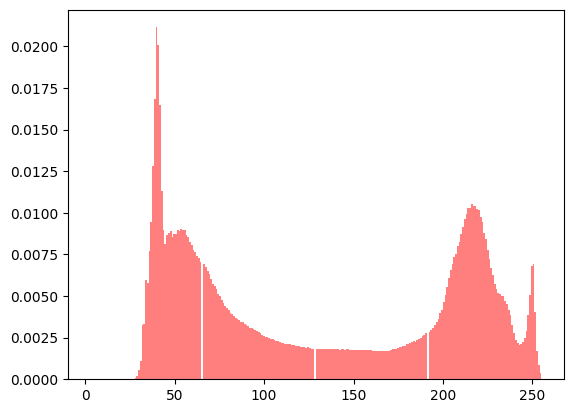

In [ ]:
# Находим максимальные значения плотности для красного канала

np.max(plt.hist(rgb[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)[0])

In [ ]:
# 5. Выполните линейную нормировку и растяжение на диапазон 0-255 гистограммы по каналам R, G и B сжатого изображения. Определите интенсивность каналов R, G, B для пикселя, находящегося на пересечении 1568 строки и 1096 столбца матричного представления изображения.

In [ ]:
rbg_new = rgb.copy()

In [ ]:
rbg_new[:, :, 0] = (rbg_new[:, :, 0] - np.min(rbg_new[:, :, 0]))/(np.max(rbg_new[:, :, 0]) - np.min(rbg_new[:, :, 0]))*255
rbg_new[:, :, 1] = (rbg_new[:, :, 1] - np.min(rbg_new[:, :, 1]))/(np.max(rbg_new[:, :, 1]) - np.min(rbg_new[:, :, 1]))*255
rbg_new[:, :, 2] = (rbg_new[:, :, 2] - np.min(rbg_new[:, :, 2]))/(np.max(rbg_new[:, :, 2]) - np.min(rbg_new[:, :, 2]))*255

In [ ]:
rbg_new[1568][1096]

array([ 48,  29, 210], dtype=uint8)

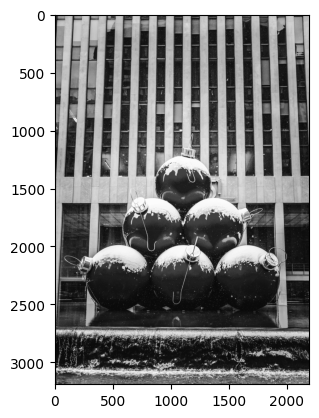

In [ ]:
img_grey = cv2.cvtColor(rbg_new, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey,cmap='gray');

In [ ]:
# 6. Выполните вейвлет-преобразование Хаара для изображения полученного после шага 5.
wavelet = 'haar'
c = pywt.dwt2(img_grey,wavelet)
cA, (cH, cV, cD)= c

In [ ]:
# 7. Выполните повторное вейвлет-преобразование Хаара для набора cA шага 6.
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)

In [ ]:
# 8. Обнулите коэффициенты меньшие по модулю значения threshold = 100 набора cA1.
th = 100
cA1[np.abs(cA1) < th] = 0

In [ ]:
# Подсчет количества нулей в массиве
np.count_nonzero(cA1 == 0)

0